<b> Chapter 11 - Deep Learning</b>

In [1]:
# Deep Learning

import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline





def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.randon.seed(seed)
    
    
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR,"images", CHAPTER_ID,fig_id + ".png")
    print("saving figure",fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format="png", dpi=300)
    



# Vanishing/Exploding Gradients Problem

In [2]:
def logit(z):
    return 1/ (1 + np.exp(-z))

saving figure sigmoid_saturation_plot


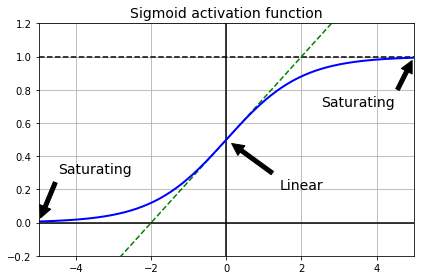

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

As dicussed, the backpropagation algorithm works by going from the output layer to the input layer, and propagating the error gradient on the way back. Once the algorithm has computed the gradient of the cost function in regards to each parameter in the network, it uses these gradients to update each parameter with a Gradient Descent step/

The issue is however, while gradient descent if great for optimizing the cost function (error term), these gradients often get smaller and smaller as the algorithm progresses down to the lower layers. As a result, the Gradient Descent update leave the lower layer connection weights virtually unchanged, and training never converges to a good solution. __This problem is often known as the <i>vanishing gradient</i> problem__. In some cases, the opposite may happen: where by the gradient can grow bigger and bigger, so many layers get insanely large weight updates and the algorithm diverges. This is known as the _exploding gradients_ problem, which is mostly encountered in _recurrent neural netowks_. More generally, deep neural networks suffer from unstable gradients: different layers may learn at widely different speeds. Looking at the logistic activation function above, you can see that when the input becomes large (negvative or positive), the function saturates at 0 or 1, with the derivative extremely close to 0. Thus when backpropagation kicks in, it has virtually no gradient to propagate back through the network, and what little gradient exists keeps getting diluted as the backpropogation progress, progresses down through each of the layers, so there is near to nothing left for the lower layers

# Xaiver and He Initialization

In [4]:
import tensorflow as tf

/Users/alvinchung/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [5]:
tf.reset_default_graph()

n_inputs = 28 * 28 # MNIST
n_hidden1 = 300

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name = "X")

In [6]:
he_init = tf.contrib.layers.variance_scaling_initializer()
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, kernel_initializer=he_init, name="hidden1")

# Nonsaturating Activation Functions

### Leaky ReLU (Rectified Linear Unit)

The ReLU activation function is not perfect. It suffers from a problem known as the _dying ReLU's_. During training, some neurons can effectively die, meaning they stop outputting anything other than 0. In some cases, you may find that half of your network's neurons are dead, especially if you used a large learning rate. During training, if a neuron's weights get updated such that the weighted sum of the neuron's input is negative, it will start outputting 0. When this happens, the neuron effectively dies, since the gradient for the ReLU function is 0, when the input in negative.

To solve this problem, you may want to use a variant of the ReLU function, such as the leaky ReLU. the hyperparameter alpha defines how much of the function __"leaks"__: it is the slope of the function for z < 0, and is typically set to 0.01. This small slope ensures that leaky ReLUs never die; and that they can go int a long coma, but eventually have the chance to wake up. 

- _Note:_ setting alpha to 0.2(huge leak) seems to result in better performance than when alpha = 0.01 (small leak).


In [7]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z,z)

saving figure leaky_relu_plot


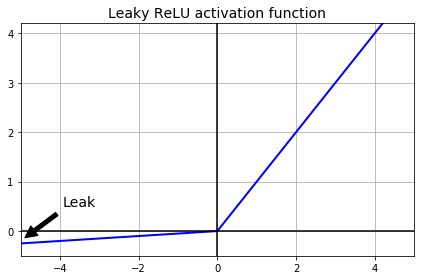

In [8]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [9]:
# implementing Leaky Relu in TensorFlow:

In [10]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name = "X")

In [11]:
def leaky_relu(z, name=None):
    return tf.maximum(0.01*z,z,name=name)


hidden1 = tf.layers.dense(X, n_hidden1, activation=leaky_relu, name ="hidden1")

In [12]:
# Let's train a neural network on MNIST using the Leaky ReLU. First let's create the graph:

In [13]:
tf.reset_default_graph()


n_inputs = 28 * 28 # MNIST

n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [14]:
X = tf.placeholder(tf.float32, shape=(None,n_inputs), name = "X")
y = tf.placeholder(tf.int64,shape=(None),name ="y")

In [15]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X,n_hidden1, activation=leaky_relu, name = "hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=leaky_relu,name = "hidden2")
    logits = tf.layers.dense(hidden2,n_outputs, name="outputs")

In [16]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [17]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [18]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

In [19]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Let's load the data

In [20]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [21]:
# Training

n_epochs = 40
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch,y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op,feed_dict={X: X_batch, y: y_batch})
        if epoch % 5 == 0:
            acc_train = accuracy.eval(feed_dict={X:X_batch,y:y_batch})
            acc_test = accuracy.eval(feed_dict={X: mnist.validation.images, y: mnist.validation.labels})
            
            print(epoch, "Batch accuracy: ", acc_train, "Validation accuracy:", acc_test)
        save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy:  0.94 Validation accuracy: 0.9028
5 Batch accuracy:  0.96 Validation accuracy: 0.9504
10 Batch accuracy:  0.98 Validation accuracy: 0.9642
15 Batch accuracy:  1.0 Validation accuracy: 0.9698
20 Batch accuracy:  0.98 Validation accuracy: 0.9742
25 Batch accuracy:  1.0 Validation accuracy: 0.9762
30 Batch accuracy:  1.0 Validation accuracy: 0.9776
35 Batch accuracy:  1.0 Validation accuracy: 0.9778


### ELU (Exponential Linear Unit)

In [22]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z)-1),z)

saving figure elu_plot


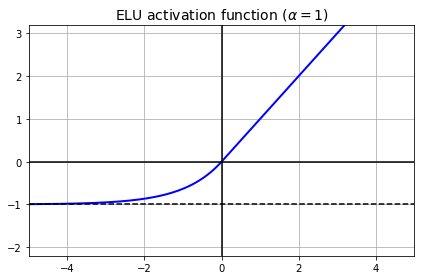

In [23]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

Implementing ELU in TensorFlow is trivial, just specify the activation function when building each layer:

In [24]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name ="X")

In [25]:
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.elu, name="hidden1")

### SELU 

This activation function was proposed in this great paper by Günter Klambauer, Thomas Unterthiner and Andreas Mayr, published in June 2017 (I will definitely add it to the book). It outperforms the other activation functions very significantly for deep neural networks, so you should really try it out.

In [26]:
def selu(z, scale=1.0507009873554804934193349852946,alpha=1.6732632423543772848170429916717):
    return scale * elu(z,alpha)

saving figure selu_plot


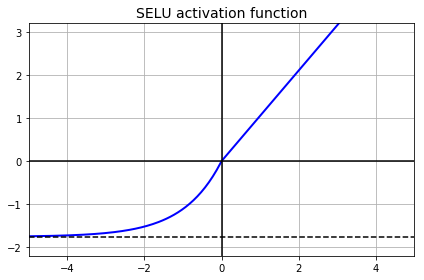

In [27]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()


With this activation function, even a 100 layer deep neural network preserves roughly mean 0 and standard deviation 1 across all layers, avoiding the exploding/vanishing gradients problem:

In [28]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100))
for layer in range(100):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1/100))
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=1)
    stds = np.std(Z, axis=1)
    if layer % 10 == 0:
        print("Layer {}: {:.2f} < mean < {:.2f}, {:.2f} < std deviation < {:.2f}".format(
            layer, means.min(), means.max(), stds.min(), stds.max()))

Layer 0: -0.26 < mean < 0.27, 0.74 < std deviation < 1.27
Layer 10: -0.24 < mean < 0.27, 0.74 < std deviation < 1.27
Layer 20: -0.17 < mean < 0.18, 0.74 < std deviation < 1.24
Layer 30: -0.27 < mean < 0.24, 0.78 < std deviation < 1.20
Layer 40: -0.38 < mean < 0.39, 0.74 < std deviation < 1.25
Layer 50: -0.27 < mean < 0.31, 0.73 < std deviation < 1.27
Layer 60: -0.26 < mean < 0.43, 0.74 < std deviation < 1.35
Layer 70: -0.19 < mean < 0.21, 0.75 < std deviation < 1.21
Layer 80: -0.18 < mean < 0.16, 0.72 < std deviation < 1.19
Layer 90: -0.19 < mean < 0.16, 0.75 < std deviation < 1.20


Here's a TensorFlow implementation (there will almost certainly be a tf.nn.selu() function in future TensorFlow versions):

In [29]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * tf.where(z >= 0.0, z, alpha * tf.nn.elu(z))


SELUs can also be combined with dropout, check out this implementation by the Institute of Bioinformatics, Johannes Kepler University Linz.


Let's create a neural net for MNIST using the SELU activation function:

In [30]:
tf.reset_default_graph()


n_inputs = 28 * 28 # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None,n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X,n_hidden1, activation=selu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=selu,name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()
n_epochs = 40
batch_size = 50


In [31]:
means = mnist.train.images.mean(axis=0, keepdims=True)
stds = mnist.train.images.std(axis=0, keepdims=True) + 1e-10

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch_scaled = (X_batch - means) / stds
            sess.run(training_op, feed_dict={X: X_batch_scaled, y: y_batch})
        if epoch % 5 == 0:
            acc_train = accuracy.eval(feed_dict={X: X_batch_scaled, y: y_batch})
            X_val_scaled = (mnist.validation.images - means) / stds
            acc_test = accuracy.eval(feed_dict={X: X_val_scaled, y: mnist.validation.labels})
            print(epoch, "Batch accuracy:", acc_train, "Validation accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final_selu.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9244
5 Batch accuracy: 0.96 Validation accuracy: 0.9572
10 Batch accuracy: 0.98 Validation accuracy: 0.9634
15 Batch accuracy: 1.0 Validation accuracy: 0.9658
20 Batch accuracy: 1.0 Validation accuracy: 0.9686
25 Batch accuracy: 1.0 Validation accuracy: 0.9698
30 Batch accuracy: 1.0 Validation accuracy: 0.9694
35 Batch accuracy: 1.0 Validation accuracy: 0.9696


# Batch Normalization

In [ ]:
tf.reset_default_graph()


import tensorflow as tf


n_inputs = 28 * 28 
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name ="X")

training = tf.placeholder_with_default(False, shape=(),name='training')

hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1")
bn1 = tf.layers.batch_normalization(hidden1, training=training,momentum=0.9)
bn1_act = tf.nn.elu(bn1)

hidden2 = tf.layers.dense(bn1_act, n_hidden2, name = "hidden2")
bn2 = tf.layers.batch_normalization(hidden2, training=training, momentum=0.9)
bn2_act = tf.nn.elu(bn2)

logits_before_bn = tf.layers.dense(vn2_act, n_outputs, name="outputs")
logits = tf.layers.batch_normalization(logits_before_bn,training=training,momentum=0.9)



To avoid repeating the same parameters over and over, we can use Python's partial() function:

In [39]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs),name="X")
training = tf.placeholder_with_default(False,shape=(), name="training")

from functools import partial

my_batch_norm_layer = partial(tf.layers.batch_normalization, training=training, momentum=0.9)

hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1")
bn1 = my_batch_norm_layer(hidden1)
bn1_act = tf.nn.elu(bn1)
hidden2 = tf.layers.dense(bn1_act, n_hidden2, name = "hidden2")
bn2 = my_batch_norm_layer(hidden2)
bn2_act = tf.nn.elu(bn2)
logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name="outputs")
logits = my_batch_norm_layer(logits_before_bn)

In [41]:
tf.reset_default_graph()

batch_norm_momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name='training')

with tf.name_scope("dnn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()

    my_batch_norm_layer = partial(
            tf.layers.batch_normalization,
            training=training,
            momentum=batch_norm_momentum)

    my_dense_layer = partial(
            tf.layers.dense,
            kernel_initializer=he_init)

    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    bn1 = tf.nn.elu(my_batch_norm_layer(hidden1))
    hidden2 = my_dense_layer(bn1, n_hidden2, name="hidden2")
    bn2 = tf.nn.elu(my_batch_norm_layer(hidden2))
    logits_before_bn = my_dense_layer(bn2, n_outputs, name="outputs")
    logits = my_batch_norm_layer(logits_before_bn)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

## Faster Optimizers

### Momentum Optimization

In [46]:
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9)


### Nesterov Accelerated Gradient

In [47]:
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=0.9, 
                                       use_nesterov=True)

### AdaGrad

In [56]:
optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)

### Adam Optimization

In [57]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

### Learning Rate Scheduling

In [61]:
tf.reset_default_graph()

n_inputs = 28 * 28 # MNIST

n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10


X = tf.placeholder(tf.float32,shape=(None,n_inputs), name = "X")
y = tf.placeholder(tf.int64, shape=(None), name ="y")


with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X,n_hidden1,activation=tf.nn.relu,name="hidden1")
    hidden2 = tf.layers.dense(hidden1,n_hidden2, activation=tf.nn.relu, name="hidden2")
    logits = tf.layers.dense(hidden2,n_outputs,name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy,name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32),name="accuracy")

with tf.name_scope("train"):
    initial_learning_rate = 0.1
    decay_steps = 10000
    decay_rate = 1/10
    global_step = tf.Variable(0,trainable=False, name="global_step")
    learning_rate = tf.train.exponential_decay(initial_learning_rate,global_step,
                                              decay_steps,decay_rate)
    optimizer = tf.train.MomentumOptimizer(learning_rate,momentum=0.9)
    training_op = optimizer.minimize(loss,global_step=global_step)


In [62]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [64]:
n_epochs = 5
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X:mnist.test.images,y:mnist.test.labels})
        
        print(epoch, "Test accuracy:", accuracy_val)
        
    saver_path = saver.save(sess, "./my_model_final.ckpt")
            
            
            
            

0 Test accuracy: 0.0974
1 Test accuracy: 0.0974
2 Test accuracy: 0.0974
3 Test accuracy: 0.0974
4 Test accuracy: 0.0974


# Avoiding Overfitting Through Regularization

$\ell_1$ and $\ell_2$ regularization

Let's implement $\ell_1$ regularization manually. First, we create the model, as usual (with just one hidden layer this time, for simplicity):

In [70]:
tf.reset_default_graph()

In [71]:
n_inputs = 28 * 28 # MNIST
n_hidden1 = 300
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None,n_inputs), name = "X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

Next, we will use Python's partial() function to avoid repeating the same arguments over and over again. Note we set the _kernel_regularizer_ argument:

In [72]:
scale = 0.001

In [73]:
my_dense_layer = partial(tf.layers.dense,activation=tf.nn.relu,
                        kernel_regularizer=tf.contrib.layers.l1_regularizer(scale))

with tf.name_scope("dnn"):
    hidden1 = my_dense_layer(X,n_hidden1,name="hidden1")
    hidden2 = my_dense_layer(hidden1, n_hidden2, name = "hidden2")
    logits = my_dense_layer(hidden2, n_outputs,activation=None, name = "outputs")

Next we must add the regularization losses to the base loss:

In [74]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    base_loss = tf.reduce_mean(xentropy, name="avg_xentopy")
    reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    loss = tf.add_n([base_loss] + reg_losses, name= "loss")


and the rest is the same as usual:

In [75]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32),name="accuracy")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [77]:
n_epochs
batch_size = 200

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch,y:y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,y: mnist.test.labels})
        
        print(epoch,"Test accuracy:", accuracy_val)
        
    save_path = saver.save(sess, "./my_model_final.ckpt")
        

0 Test accuracy: 0.8216
1 Test accuracy: 0.8764
2 Test accuracy: 0.893
3 Test accuracy: 0.9011
4 Test accuracy: 0.9058


## Dropout

In [82]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs),name = "X")
y = tf.placeholder(tf.int64, shape=(None), name = "y")

In [83]:
training = tf.placeholder_with_default(False, shape=(), name="training")

dropout_rate = 0.5
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X_drop,n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training=training)
    hidden2 = tf.layers.dense(hidden1_drop,n_hidden2, activation=tf.nn.relu,
                              name="hidden2")
    hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training=training)
    logits = tf.layers.dense(hidden2_drop,n_outputs,name="outputs")

In [85]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy,name="loss")
    
with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate,momentum=0.9)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [86]:
n_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op,feed_dict = { training: True, X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X:mnist.test.images, y: mnist.test.labels})
        print(epoch,"Test accuracy", acc_test)
    save_path = saver.save(sess,"./my_model_final.ckpt")

0 Test accuracy 0.9223
1 Test accuracy 0.9432
2 Test accuracy 0.949
3 Test accuracy 0.9518
4 Test accuracy 0.9546
5 Test accuracy 0.9579
6 Test accuracy 0.9602
7 Test accuracy 0.9646
8 Test accuracy 0.9647
9 Test accuracy 0.9629
10 Test accuracy 0.9649
11 Test accuracy 0.9647
12 Test accuracy 0.967
13 Test accuracy 0.9665
14 Test accuracy 0.9678
15 Test accuracy 0.9651
16 Test accuracy 0.9666
17 Test accuracy 0.9671
18 Test accuracy 0.9678
19 Test accuracy 0.9682
